<a href="https://colab.research.google.com/github/connect-midhunr/sms-spam-classifier-using-complement-naive-bayes/blob/main/SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Almost every person today owns a mobile phone with messaging and calling capabilities. Spam calls are infamous for the constant ringing of cell phones they often initiate to get promotional or fraudulent information to innocent customers. However, with the cheaper rates on bulk messaging services from wireless networks, a swarm of these spam calls has quickly shifted over to SMS messaging. There, in this scenario, classification becomes mandatory.

The objective of this project is to understand the SMS spam collection dataset and build a machine learning model to predict whether the mail is spam or not.

# Data Summary

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Storing dataset to a dataframe
import numpy as np
import pandas as pd

spam_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/SMS Spam Classifier/SMSSpamCollection', sep='\t', names=['status', 'message'])

In [ ]:
# Exploring head of the dataset
spam_df.head()

,status,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Information of features
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   status   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The columns and the data it represents are listed below:
1.   **status**: states whether the message is spam or not(ham).
2.   **message**: the message under consideration.

In [ ]:
# Number of rows in the dataset
print(f"Number of rows in the dataset: {spam_df.shape[0]}")

Number of rows in the dataset: 5572


In [ ]:
# Classes in target feature
print(spam_df['status'].unique())

['ham' 'spam']


Target feature is binary.

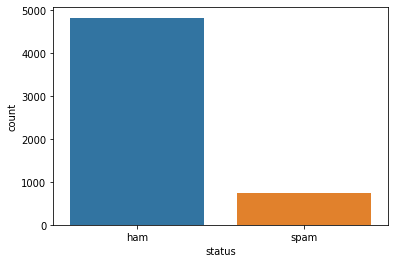

In [ ]:
# Plotting bar graph to check whether the dataset is balanced or not
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(spam_df['status'])

The dataset is highly imbalanced. The majority class is 'ham'.

# Data Preprocessing

In [ ]:
# Number of duplicate rows
print(f"Number of duplicate rows: {spam_df[spam_df.duplicated()].shape[0]}")

Number of duplicate rows: 403


In [ ]:
# Lets remove duplicate rows
spam_df.drop_duplicates(inplace=True)
spam_df = spam_df.reset_index()
print(f"Number of duplicate rows: {spam_df[spam_df.duplicated()].shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Number of missing values
spam_df.isnull().sum().sort_values(ascending=False)

index      0
status     0
message    0
dtype: int64

# Data Visualization

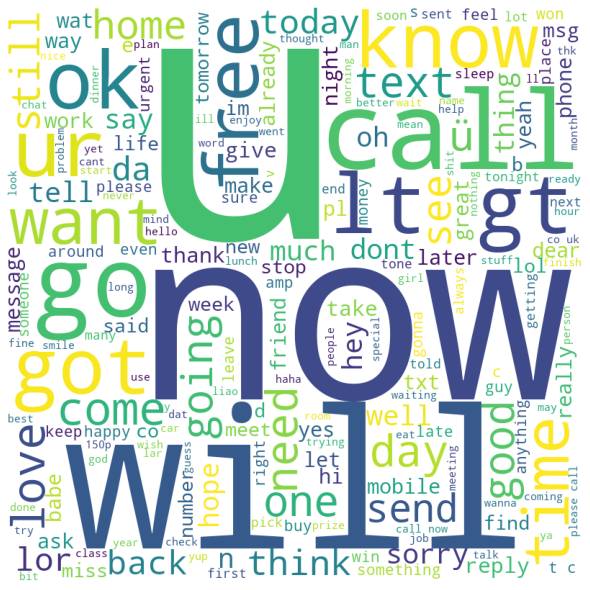

In [ ]:
# Wordcloud of messages
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for message in spam_df.message:
  # converting object to string
  mod_message = str(message)

  # Converting all characters to lower case and splitting into words
  mod_message = mod_message.lower().split()

  # Combining all the words
  comment_words += " ".join(mod_message) + " "

wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, min_font_size=5).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
 
plt.show()

# Text Processing

Stemming is used for text normalization since getting base words is more crucial than meaning of words for judging whether the message is spam or not.

In [ ]:
# Importing relevant libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Initializing relevant variables
ps = PorterStemmer()
corpus = []

# Loop for text normalization
for message in spam_df.message:
  # Converting object to string
  mod_message = str(message)

  # Removing punctuations and numbers
  mod_message = re.sub('[^a-zA-Z]', ' ', mod_message)

  # Converting all characters to lower case and splitting into words
  mod_message = mod_message.lower().split()

  # Removing stopwords and stemming the words
  mod_message = [ps.stem(word) for word in mod_message if word not in stopwords.words('english')]

  # Joining words to form a sentence and adding to corpus
  corpus.append(' '.join(mod_message))

In [ ]:
# Printing first 5 stemmed messages
for i in range(5):
  print(corpus[i])

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
u dun say earli hor u c alreadi say
nah think goe usf live around though


# Modelling

In [ ]:
# independant features
X = corpus

# dependant feature
y = spam_df['status']

In [ ]:
# spliting the datasets to training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
print(len(X_train))
print(y_train.shape)
print(len(X_test))
print(y_test.shape)

3876
(3876,)
1293
(1293,)


Lets use complement naive bayes classifier for training as each feature represents the frequency of the word in each message and to correct the severe assumptions made due to the imbalanced dataset.
Bag-of-Words is used for feature extraction from text since just the frequency of words needs to be considered instead of their importance. 
Both of these processes are combined in a pipeline.

In [ ]:
# Initializing relevant libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline

# Defining pipeling
model = Pipeline(steps=[('bow', CountVectorizer()), ('nb', ComplementNB())])

# Fit dataset to model
model.fit(X_train, y_train)

# Model prediction
y_test_pred = model.predict(X_test)

In [ ]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,ham,ham
1,ham,ham
2,ham,ham
3,ham,ham
4,ham,ham
...,...,...
1288,ham,ham
1289,ham,ham
1290,ham,ham
1291,spam,spam


Accuracy  : 95.050271 %
Precision : 95.998775 %
Recall    : 95.050271 %




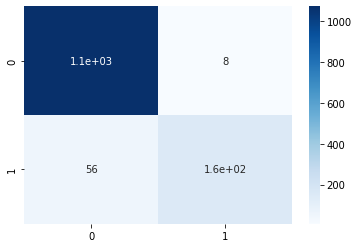

In [ ]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print(f"Accuracy  : {round(accuracy_score(y_test, y_test_pred) * 100, 6)} %")
print(f"Precision : {round(precision_score(y_test, y_test_pred, average='weighted') * 100, 6)} %")
print(f"Recall    : {round(recall_score(y_test, y_test_pred, average='weighted') * 100, 6)} %")

# Confusion matrix
cf_matrix = confusion_matrix(y_test_pred, y_test)
print("\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')